In [18]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import math
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/no-dir/weatherAUS-noDir.csv


In [7]:
df = pd.read_csv('/kaggle/input/no-dir/weatherAUS-noDir.csv')
print(df.columns)

Index(['MinTemp', 'MaxTemp', 'Rainfall', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Temp9am', 'Temp3pm', 'RainToday',
       'RainTomorrow', 'WindSpeedNorth', 'WindSpeedEast', 'WindSpeedNorth9am',
       'WindSpeedEast9am', 'WindSpeedNorth3pm', 'WindSpeedEast3pm'],
      dtype='object')


In [14]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [12]:
x = list(df.columns).index("RainTomorrow")
ls= list(df.columns[:x])+list(df.columns[x+1:])
ls.append("RainTomorrow")
df = df[ls]
df.head()
del x
print(df.columns)

Index(['MinTemp', 'MaxTemp', 'Rainfall', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Temp9am', 'Temp3pm', 'RainToday',
       'WindSpeedNorth', 'WindSpeedEast', 'WindSpeedNorth9am',
       'WindSpeedEast9am', 'WindSpeedNorth3pm', 'WindSpeedEast3pm',
       'RainTomorrow'],
      dtype='object')


In [17]:
X=df[df.columns[:-1]]
y = df[df.columns[-1]]
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 123)
print(x_train.shape)
print(y_train.shape)
print(y_test.shape)

(113712, 16)
(113712,)
(28429,)


In [19]:
scaler = StandardScaler()
cols = x_train.columns
x_train = pd.DataFrame(scaler.fit_transform(x_train))
x_train.columns = cols
i=0
means = scaler.mean_
var = scaler.var_
for col in x_train.columns:
    x_test[col] =  (x_test[col]-means[i])/math.sqrt(var[i])
    i+=1


         MinTemp   MaxTemp  Rainfall  Humidity9am  Humidity3pm  Pressure9am  \
0      -1.704810 -0.523806 -0.275823    -1.045636    -0.897572    -0.305621   
1      -1.188298 -0.327203 -0.275823    -0.046033    -0.897572     0.850521   
2       1.237739  0.599639 -0.275823     0.585295     0.602186    -0.320073   
3       1.175132  1.835429 -0.275823     0.427463    -1.139468    -0.348976   
4       0.126458  0.417079 -0.275823    -0.835193    -0.945951    -0.098479   
...          ...       ...       ...          ...          ...          ...   
113707 -1.235254 -1.043399 -0.275823    -0.414307    -0.317020    -0.464591   
113708  1.112525  0.529424  1.074267     0.006578     1.376254    -0.941499   
113709  0.846443  0.164304 -0.275823     0.848349     1.134358     0.807166   
113710 -0.765698 -0.074428 -0.275823     1.637509     0.021634     0.749359   
113711  0.282976 -0.200815  0.079464     0.059189     0.457048     0.156836   

        Pressure3pm   Temp9am   Temp3pm  RainToday 

In [24]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV

In [23]:
mlc = MLPClassifier(hidden_layer_sizes = (128,64), activation = 'relu', verbose = True, max_iter = 100)
mlc.fit(x_train, y_train)
print(mlc.score(x_test, y_test))

Iteration 1, loss = 0.36644575
Iteration 2, loss = 0.34739320
Iteration 3, loss = 0.34293328
Iteration 4, loss = 0.33945964
Iteration 5, loss = 0.33731639
Iteration 6, loss = 0.33592992
Iteration 7, loss = 0.33455285
Iteration 8, loss = 0.33315229
Iteration 9, loss = 0.33212719
Iteration 10, loss = 0.33093478
Iteration 11, loss = 0.33044722
Iteration 12, loss = 0.32940440
Iteration 13, loss = 0.32801955
Iteration 14, loss = 0.32737124
Iteration 15, loss = 0.32706519
Iteration 16, loss = 0.32552478
Iteration 17, loss = 0.32527461
Iteration 18, loss = 0.32482762
Iteration 19, loss = 0.32397117
Iteration 20, loss = 0.32316743
Iteration 21, loss = 0.32230306
Iteration 22, loss = 0.32169358
Iteration 23, loss = 0.32113928
Iteration 24, loss = 0.32075601
Iteration 25, loss = 0.32006635
Iteration 26, loss = 0.31957432
Iteration 27, loss = 0.31898771
Iteration 28, loss = 0.31806733
Iteration 29, loss = 0.31808810
Iteration 30, loss = 0.31694614
Iteration 31, loss = 0.31651218
Iteration 32, los

/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


In [32]:
param_dicti = {'hidden_layer_sizes' : [(128, 64, 32), (32, 16, 8)],'random_state' : [123, 516],'activation' : ['relu', 'tanh', 'logistic'],'learning_rate_init' : [0.001, 0.005, 0.01],'max_iter' : [50, 250]}
grid = GridSearchCV(estimator = MLPClassifier(verbose = True), param_grid = param_dicti)
grid_cv = grid.fit(x_train, y_train)
print(grid_cv.best_estimator_)

Iteration 1, loss = 0.37371200
Iteration 2, loss = 0.34861668
Iteration 3, loss = 0.34298486
Iteration 4, loss = 0.33976588
Iteration 5, loss = 0.33658253
Iteration 6, loss = 0.33463306
Iteration 7, loss = 0.33400976
Iteration 8, loss = 0.33129745
Iteration 9, loss = 0.33006940
Iteration 10, loss = 0.32858684
Iteration 11, loss = 0.32677714
Iteration 12, loss = 0.32559485
Iteration 13, loss = 0.32488215
Iteration 14, loss = 0.32381064
Iteration 15, loss = 0.32267126
Iteration 16, loss = 0.32103442
Iteration 17, loss = 0.32060549
Iteration 18, loss = 0.31941139
Iteration 19, loss = 0.31881976
Iteration 20, loss = 0.31763443
Iteration 21, loss = 0.31630487
Iteration 22, loss = 0.31499480
Iteration 23, loss = 0.31446790
Iteration 24, loss = 0.31291795
Iteration 25, loss = 0.31244214
Iteration 26, loss = 0.31113217
Iteration 27, loss = 0.30991451
Iteration 28, loss = 0.30888657
Iteration 29, loss = 0.30811679
Iteration 30, loss = 0.30737485
Iteration 31, loss = 0.30668254
Iteration 32, los

/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


Iteration 1, loss = 0.37212711
Iteration 2, loss = 0.34690303
Iteration 3, loss = 0.34175845
Iteration 4, loss = 0.33871517
Iteration 5, loss = 0.33589490
Iteration 6, loss = 0.33430475
Iteration 7, loss = 0.33298493
Iteration 8, loss = 0.33040619
Iteration 9, loss = 0.32917244
Iteration 10, loss = 0.32765886
Iteration 11, loss = 0.32631198
Iteration 12, loss = 0.32485339
Iteration 13, loss = 0.32395924
Iteration 14, loss = 0.32293141
Iteration 15, loss = 0.32208565
Iteration 16, loss = 0.32046177
Iteration 17, loss = 0.31968410
Iteration 18, loss = 0.31870551
Iteration 19, loss = 0.31835932
Iteration 20, loss = 0.31726637
Iteration 21, loss = 0.31624118
Iteration 22, loss = 0.31498855
Iteration 23, loss = 0.31410926
Iteration 24, loss = 0.31305806
Iteration 25, loss = 0.31215911
Iteration 26, loss = 0.31080979
Iteration 27, loss = 0.31009342
Iteration 28, loss = 0.30951358
Iteration 29, loss = 0.30867584
Iteration 30, loss = 0.30763187
Iteration 31, loss = 0.30658376
Iteration 32, los

/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


Iteration 1, loss = 0.37392595
Iteration 2, loss = 0.34990079
Iteration 3, loss = 0.34419610
Iteration 4, loss = 0.34076773
Iteration 5, loss = 0.33764428
Iteration 6, loss = 0.33555669
Iteration 7, loss = 0.33428226
Iteration 8, loss = 0.33231093
Iteration 9, loss = 0.33136623
Iteration 10, loss = 0.32941807
Iteration 11, loss = 0.32805149
Iteration 12, loss = 0.32676148
Iteration 13, loss = 0.32664886
Iteration 14, loss = 0.32530509
Iteration 15, loss = 0.32401933
Iteration 16, loss = 0.32297876
Iteration 17, loss = 0.32139654
Iteration 18, loss = 0.32052200
Iteration 19, loss = 0.31962706
Iteration 20, loss = 0.31794785
Iteration 21, loss = 0.31762523
Iteration 22, loss = 0.31631766
Iteration 23, loss = 0.31538302
Iteration 24, loss = 0.31390667
Iteration 25, loss = 0.31366307
Iteration 26, loss = 0.31191796
Iteration 27, loss = 0.31139777
Iteration 28, loss = 0.31064731
Iteration 29, loss = 0.30964606
Iteration 30, loss = 0.30841319
Iteration 31, loss = 0.30761023
Iteration 32, los

/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


Iteration 1, loss = 0.37351721
Iteration 2, loss = 0.34909893
Iteration 3, loss = 0.34316763
Iteration 4, loss = 0.33940861
Iteration 5, loss = 0.33704912
Iteration 6, loss = 0.33466645
Iteration 7, loss = 0.33373175
Iteration 8, loss = 0.33126416
Iteration 9, loss = 0.33046149
Iteration 10, loss = 0.32873096
Iteration 11, loss = 0.32766661
Iteration 12, loss = 0.32608385
Iteration 13, loss = 0.32581699
Iteration 14, loss = 0.32453561
Iteration 15, loss = 0.32345267
Iteration 16, loss = 0.32289026
Iteration 17, loss = 0.32104803
Iteration 18, loss = 0.32024362
Iteration 19, loss = 0.31902929
Iteration 20, loss = 0.31837498
Iteration 21, loss = 0.31762188
Iteration 22, loss = 0.31675000
Iteration 23, loss = 0.31571328
Iteration 24, loss = 0.31434500
Iteration 25, loss = 0.31367334
Iteration 26, loss = 0.31264033
Iteration 27, loss = 0.31199486
Iteration 28, loss = 0.31095108
Iteration 29, loss = 0.31022473
Iteration 30, loss = 0.30914822
Iteration 31, loss = 0.30804153
Iteration 32, los

/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


Iteration 1, loss = 0.37392952
Iteration 2, loss = 0.34953675
Iteration 3, loss = 0.34293534
Iteration 4, loss = 0.33968502
Iteration 5, loss = 0.33698325
Iteration 6, loss = 0.33459751
Iteration 7, loss = 0.33337362
Iteration 8, loss = 0.33096725
Iteration 9, loss = 0.32999288
Iteration 10, loss = 0.32860035
Iteration 11, loss = 0.32725897
Iteration 12, loss = 0.32563384
Iteration 13, loss = 0.32498528
Iteration 14, loss = 0.32374893
Iteration 15, loss = 0.32285850
Iteration 16, loss = 0.32209395
Iteration 17, loss = 0.32040175
Iteration 18, loss = 0.31905333
Iteration 19, loss = 0.31813099
Iteration 20, loss = 0.31698613
Iteration 21, loss = 0.31682869
Iteration 22, loss = 0.31548006
Iteration 23, loss = 0.31376794
Iteration 24, loss = 0.31280491
Iteration 25, loss = 0.31259082
Iteration 26, loss = 0.31122846
Iteration 27, loss = 0.31062809
Iteration 28, loss = 0.30997851
Iteration 29, loss = 0.30845471
Iteration 30, loss = 0.30773528
Iteration 31, loss = 0.30697114
Iteration 32, los

/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


Iteration 1, loss = 0.37703890
Iteration 2, loss = 0.34863198
Iteration 3, loss = 0.34204963
Iteration 4, loss = 0.33928587
Iteration 5, loss = 0.33723324
Iteration 6, loss = 0.33459579
Iteration 7, loss = 0.33272303
Iteration 8, loss = 0.33187236
Iteration 9, loss = 0.33003156
Iteration 10, loss = 0.32885428
Iteration 11, loss = 0.32749383
Iteration 12, loss = 0.32646937
Iteration 13, loss = 0.32510683
Iteration 14, loss = 0.32425146
Iteration 15, loss = 0.32269478
Iteration 16, loss = 0.32178717
Iteration 17, loss = 0.32075831
Iteration 18, loss = 0.31987084
Iteration 19, loss = 0.31839094
Iteration 20, loss = 0.31760246
Iteration 21, loss = 0.31632233
Iteration 22, loss = 0.31512148
Iteration 23, loss = 0.31401464
Iteration 24, loss = 0.31279954
Iteration 25, loss = 0.31189595
Iteration 26, loss = 0.31147819
Iteration 27, loss = 0.31025865
Iteration 28, loss = 0.30921746
Iteration 29, loss = 0.30781235
Iteration 30, loss = 0.30752346
Iteration 31, loss = 0.30637655
Iteration 32, los

/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


Iteration 1, loss = 0.37585107
Iteration 2, loss = 0.34697579
Iteration 3, loss = 0.34038160
Iteration 4, loss = 0.33821271
Iteration 5, loss = 0.33556148
Iteration 6, loss = 0.33340195
Iteration 7, loss = 0.33187249
Iteration 8, loss = 0.33057314
Iteration 9, loss = 0.32920129
Iteration 10, loss = 0.32787972
Iteration 11, loss = 0.32712618
Iteration 12, loss = 0.32575109
Iteration 13, loss = 0.32426244
Iteration 14, loss = 0.32389602
Iteration 15, loss = 0.32175008
Iteration 16, loss = 0.32076079
Iteration 17, loss = 0.31992265
Iteration 18, loss = 0.31863120
Iteration 19, loss = 0.31759738
Iteration 20, loss = 0.31640087
Iteration 21, loss = 0.31525293
Iteration 22, loss = 0.31431758
Iteration 23, loss = 0.31353598
Iteration 24, loss = 0.31230715
Iteration 25, loss = 0.31071185
Iteration 26, loss = 0.31038336
Iteration 27, loss = 0.30910407
Iteration 28, loss = 0.30842330
Iteration 29, loss = 0.30781624
Iteration 30, loss = 0.30637822
Iteration 31, loss = 0.30539130
Iteration 32, los

/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


Iteration 1, loss = 0.37798522
Iteration 2, loss = 0.34843128
Iteration 3, loss = 0.34266813
Iteration 4, loss = 0.33992523
Iteration 5, loss = 0.33795816
Iteration 6, loss = 0.33587738
Iteration 7, loss = 0.33406121
Iteration 8, loss = 0.33237042
Iteration 9, loss = 0.33154567
Iteration 10, loss = 0.33010312
Iteration 11, loss = 0.32857588
Iteration 12, loss = 0.32712373
Iteration 13, loss = 0.32650347
Iteration 14, loss = 0.32554202
Iteration 15, loss = 0.32425101
Iteration 16, loss = 0.32280978
Iteration 17, loss = 0.32261673
Iteration 18, loss = 0.32087989
Iteration 19, loss = 0.31996346
Iteration 20, loss = 0.31867925
Iteration 21, loss = 0.31793783
Iteration 22, loss = 0.31683788
Iteration 23, loss = 0.31598437
Iteration 24, loss = 0.31474077
Iteration 25, loss = 0.31383630
Iteration 26, loss = 0.31204360
Iteration 27, loss = 0.31095042
Iteration 28, loss = 0.31052891
Iteration 29, loss = 0.30904448
Iteration 30, loss = 0.30833125
Iteration 31, loss = 0.30716043
Iteration 32, los

/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


Iteration 1, loss = 0.37719464
Iteration 2, loss = 0.34799239
Iteration 3, loss = 0.34218473
Iteration 4, loss = 0.33920146
Iteration 5, loss = 0.33692604
Iteration 6, loss = 0.33486459
Iteration 7, loss = 0.33216051
Iteration 8, loss = 0.33135662
Iteration 9, loss = 0.32995020
Iteration 10, loss = 0.32852547
Iteration 11, loss = 0.32753012
Iteration 12, loss = 0.32603462
Iteration 13, loss = 0.32533053
Iteration 14, loss = 0.32418066
Iteration 15, loss = 0.32341332
Iteration 16, loss = 0.32204131
Iteration 17, loss = 0.32115945
Iteration 18, loss = 0.31992656
Iteration 19, loss = 0.31873767
Iteration 20, loss = 0.31787094
Iteration 21, loss = 0.31736352
Iteration 22, loss = 0.31555180
Iteration 23, loss = 0.31515110
Iteration 24, loss = 0.31368771
Iteration 25, loss = 0.31300651
Iteration 26, loss = 0.31194569
Iteration 27, loss = 0.31090707
Iteration 28, loss = 0.31056608
Iteration 29, loss = 0.30930160
Iteration 30, loss = 0.30825776
Iteration 31, loss = 0.30708097
Iteration 32, los

/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


Iteration 1, loss = 0.37859262
Iteration 2, loss = 0.34847518
Iteration 3, loss = 0.34261773
Iteration 4, loss = 0.34018490
Iteration 5, loss = 0.33761344
Iteration 6, loss = 0.33543466
Iteration 7, loss = 0.33329723
Iteration 8, loss = 0.33193189
Iteration 9, loss = 0.32987800
Iteration 10, loss = 0.32881132
Iteration 11, loss = 0.32748336
Iteration 12, loss = 0.32613817
Iteration 13, loss = 0.32500796
Iteration 14, loss = 0.32403341
Iteration 15, loss = 0.32306450
Iteration 16, loss = 0.32191182
Iteration 17, loss = 0.32081500
Iteration 18, loss = 0.31970399
Iteration 19, loss = 0.31870161
Iteration 20, loss = 0.31710995
Iteration 21, loss = 0.31666468
Iteration 22, loss = 0.31512553
Iteration 23, loss = 0.31457006
Iteration 24, loss = 0.31349458
Iteration 25, loss = 0.31260938
Iteration 26, loss = 0.31112262
Iteration 27, loss = 0.31012319
Iteration 28, loss = 0.30956017
Iteration 29, loss = 0.30812239
Iteration 30, loss = 0.30755859
Iteration 31, loss = 0.30636151
Iteration 32, los

/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


Iteration 1, loss = 0.37371200
Iteration 2, loss = 0.34861668
Iteration 3, loss = 0.34298486
Iteration 4, loss = 0.33976588
Iteration 5, loss = 0.33658253
Iteration 6, loss = 0.33463306
Iteration 7, loss = 0.33400976
Iteration 8, loss = 0.33129745
Iteration 9, loss = 0.33006940
Iteration 10, loss = 0.32858684
Iteration 11, loss = 0.32677714
Iteration 12, loss = 0.32559485
Iteration 13, loss = 0.32488215
Iteration 14, loss = 0.32381064
Iteration 15, loss = 0.32267126
Iteration 16, loss = 0.32103442
Iteration 17, loss = 0.32060549
Iteration 18, loss = 0.31941139
Iteration 19, loss = 0.31881976
Iteration 20, loss = 0.31763443
Iteration 21, loss = 0.31630487
Iteration 22, loss = 0.31499480
Iteration 23, loss = 0.31446790
Iteration 24, loss = 0.31291795
Iteration 25, loss = 0.31244214
Iteration 26, loss = 0.31113217
Iteration 27, loss = 0.30991451
Iteration 28, loss = 0.30888657
Iteration 29, loss = 0.30811679
Iteration 30, loss = 0.30737485
Iteration 31, loss = 0.30668254
Iteration 32, los

/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


Iteration 1, loss = 0.37212711
Iteration 2, loss = 0.34690303
Iteration 3, loss = 0.34175845
Iteration 4, loss = 0.33871517
Iteration 5, loss = 0.33589490
Iteration 6, loss = 0.33430475
Iteration 7, loss = 0.33298493
Iteration 8, loss = 0.33040619
Iteration 9, loss = 0.32917244
Iteration 10, loss = 0.32765886
Iteration 11, loss = 0.32631198
Iteration 12, loss = 0.32485339
Iteration 13, loss = 0.32395924
Iteration 14, loss = 0.32293141
Iteration 15, loss = 0.32208565
Iteration 16, loss = 0.32046177
Iteration 17, loss = 0.31968410
Iteration 18, loss = 0.31870551
Iteration 19, loss = 0.31835932
Iteration 20, loss = 0.31726637
Iteration 21, loss = 0.31624118
Iteration 22, loss = 0.31498855
Iteration 23, loss = 0.31410926
Iteration 24, loss = 0.31305806
Iteration 25, loss = 0.31215911
Iteration 26, loss = 0.31080979
Iteration 27, loss = 0.31009342
Iteration 28, loss = 0.30951358
Iteration 29, loss = 0.30867584
Iteration 30, loss = 0.30763187
Iteration 31, loss = 0.30658376
Iteration 32, los

/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


Iteration 1, loss = 0.37392595
Iteration 2, loss = 0.34990079
Iteration 3, loss = 0.34419610
Iteration 4, loss = 0.34076773
Iteration 5, loss = 0.33764428
Iteration 6, loss = 0.33555669
Iteration 7, loss = 0.33428226
Iteration 8, loss = 0.33231093
Iteration 9, loss = 0.33136623
Iteration 10, loss = 0.32941807
Iteration 11, loss = 0.32805149
Iteration 12, loss = 0.32676148
Iteration 13, loss = 0.32664886
Iteration 14, loss = 0.32530509
Iteration 15, loss = 0.32401933
Iteration 16, loss = 0.32297876
Iteration 17, loss = 0.32139654
Iteration 18, loss = 0.32052200
Iteration 19, loss = 0.31962706
Iteration 20, loss = 0.31794785
Iteration 21, loss = 0.31762523
Iteration 22, loss = 0.31631766
Iteration 23, loss = 0.31538302
Iteration 24, loss = 0.31390667
Iteration 25, loss = 0.31366307
Iteration 26, loss = 0.31191796
Iteration 27, loss = 0.31139777
Iteration 28, loss = 0.31064731
Iteration 29, loss = 0.30964606
Iteration 30, loss = 0.30841319
Iteration 31, loss = 0.30761023
Iteration 32, los

/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


Iteration 1, loss = 0.37351721
Iteration 2, loss = 0.34909893
Iteration 3, loss = 0.34316763
Iteration 4, loss = 0.33940861
Iteration 5, loss = 0.33704912
Iteration 6, loss = 0.33466645
Iteration 7, loss = 0.33373175
Iteration 8, loss = 0.33126416
Iteration 9, loss = 0.33046149
Iteration 10, loss = 0.32873096
Iteration 11, loss = 0.32766661
Iteration 12, loss = 0.32608385
Iteration 13, loss = 0.32581699
Iteration 14, loss = 0.32453561
Iteration 15, loss = 0.32345267
Iteration 16, loss = 0.32289026
Iteration 17, loss = 0.32104803
Iteration 18, loss = 0.32024362
Iteration 19, loss = 0.31902929
Iteration 20, loss = 0.31837498
Iteration 21, loss = 0.31762188
Iteration 22, loss = 0.31675000
Iteration 23, loss = 0.31571328
Iteration 24, loss = 0.31434500
Iteration 25, loss = 0.31367334
Iteration 26, loss = 0.31264033
Iteration 27, loss = 0.31199486
Iteration 28, loss = 0.31095108
Iteration 29, loss = 0.31022473
Iteration 30, loss = 0.30914822
Iteration 31, loss = 0.30804153
Iteration 32, los

/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


Iteration 1, loss = 0.37392952
Iteration 2, loss = 0.34953675
Iteration 3, loss = 0.34293534
Iteration 4, loss = 0.33968502
Iteration 5, loss = 0.33698325
Iteration 6, loss = 0.33459751
Iteration 7, loss = 0.33337362
Iteration 8, loss = 0.33096725
Iteration 9, loss = 0.32999288
Iteration 10, loss = 0.32860035
Iteration 11, loss = 0.32725897
Iteration 12, loss = 0.32563384
Iteration 13, loss = 0.32498528
Iteration 14, loss = 0.32374893
Iteration 15, loss = 0.32285850
Iteration 16, loss = 0.32209395
Iteration 17, loss = 0.32040175
Iteration 18, loss = 0.31905333
Iteration 19, loss = 0.31813099
Iteration 20, loss = 0.31698613
Iteration 21, loss = 0.31682869
Iteration 22, loss = 0.31548006
Iteration 23, loss = 0.31376794
Iteration 24, loss = 0.31280491
Iteration 25, loss = 0.31259082
Iteration 26, loss = 0.31122846
Iteration 27, loss = 0.31062809
Iteration 28, loss = 0.30997851
Iteration 29, loss = 0.30845471
Iteration 30, loss = 0.30773528
Iteration 31, loss = 0.30697114
Iteration 32, los

/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


Iteration 1, loss = 0.37703890
Iteration 2, loss = 0.34863198
Iteration 3, loss = 0.34204963
Iteration 4, loss = 0.33928587
Iteration 5, loss = 0.33723324
Iteration 6, loss = 0.33459579
Iteration 7, loss = 0.33272303
Iteration 8, loss = 0.33187236
Iteration 9, loss = 0.33003156
Iteration 10, loss = 0.32885428
Iteration 11, loss = 0.32749383
Iteration 12, loss = 0.32646937
Iteration 13, loss = 0.32510683
Iteration 14, loss = 0.32425146
Iteration 15, loss = 0.32269478
Iteration 16, loss = 0.32178717
Iteration 17, loss = 0.32075831
Iteration 18, loss = 0.31987084
Iteration 19, loss = 0.31839094
Iteration 20, loss = 0.31760246
Iteration 21, loss = 0.31632233
Iteration 22, loss = 0.31512148
Iteration 23, loss = 0.31401464
Iteration 24, loss = 0.31279954
Iteration 25, loss = 0.31189595
Iteration 26, loss = 0.31147819
Iteration 27, loss = 0.31025865
Iteration 28, loss = 0.30921746
Iteration 29, loss = 0.30781235
Iteration 30, loss = 0.30752346
Iteration 31, loss = 0.30637655
Iteration 32, los

/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


Iteration 1, loss = 0.37585107
Iteration 2, loss = 0.34697579
Iteration 3, loss = 0.34038160
Iteration 4, loss = 0.33821271
Iteration 5, loss = 0.33556148
Iteration 6, loss = 0.33340195
Iteration 7, loss = 0.33187249
Iteration 8, loss = 0.33057314
Iteration 9, loss = 0.32920129
Iteration 10, loss = 0.32787972
Iteration 11, loss = 0.32712618
Iteration 12, loss = 0.32575109
Iteration 13, loss = 0.32426244
Iteration 14, loss = 0.32389602
Iteration 15, loss = 0.32175008
Iteration 16, loss = 0.32076079
Iteration 17, loss = 0.31992265
Iteration 18, loss = 0.31863120
Iteration 19, loss = 0.31759738
Iteration 20, loss = 0.31640087
Iteration 21, loss = 0.31525293
Iteration 22, loss = 0.31431758
Iteration 23, loss = 0.31353598
Iteration 24, loss = 0.31230715
Iteration 25, loss = 0.31071185
Iteration 26, loss = 0.31038336
Iteration 27, loss = 0.30910407
Iteration 28, loss = 0.30842330
Iteration 29, loss = 0.30781624
Iteration 30, loss = 0.30637822
Iteration 31, loss = 0.30539130
Iteration 32, los

/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


Iteration 1, loss = 0.37798522
Iteration 2, loss = 0.34843128
Iteration 3, loss = 0.34266813
Iteration 4, loss = 0.33992523
Iteration 5, loss = 0.33795816
Iteration 6, loss = 0.33587738
Iteration 7, loss = 0.33406121
Iteration 8, loss = 0.33237042
Iteration 9, loss = 0.33154567
Iteration 10, loss = 0.33010312
Iteration 11, loss = 0.32857588
Iteration 12, loss = 0.32712373
Iteration 13, loss = 0.32650347
Iteration 14, loss = 0.32554202
Iteration 15, loss = 0.32425101
Iteration 16, loss = 0.32280978
Iteration 17, loss = 0.32261673
Iteration 18, loss = 0.32087989
Iteration 19, loss = 0.31996346
Iteration 20, loss = 0.31867925
Iteration 21, loss = 0.31793783
Iteration 22, loss = 0.31683788
Iteration 23, loss = 0.31598437
Iteration 24, loss = 0.31474077
Iteration 25, loss = 0.31383630
Iteration 26, loss = 0.31204360
Iteration 27, loss = 0.31095042
Iteration 28, loss = 0.31052891
Iteration 29, loss = 0.30904448
Iteration 30, loss = 0.30833125
Iteration 31, loss = 0.30716043
Iteration 32, los

/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


Iteration 1, loss = 0.37719464
Iteration 2, loss = 0.34799239
Iteration 3, loss = 0.34218473
Iteration 4, loss = 0.33920146
Iteration 5, loss = 0.33692604
Iteration 6, loss = 0.33486459
Iteration 7, loss = 0.33216051
Iteration 8, loss = 0.33135662
Iteration 9, loss = 0.32995020
Iteration 10, loss = 0.32852547
Iteration 11, loss = 0.32753012
Iteration 12, loss = 0.32603462
Iteration 13, loss = 0.32533053
Iteration 14, loss = 0.32418066
Iteration 15, loss = 0.32341332
Iteration 16, loss = 0.32204131
Iteration 17, loss = 0.32115945
Iteration 18, loss = 0.31992656
Iteration 19, loss = 0.31873767
Iteration 20, loss = 0.31787094
Iteration 21, loss = 0.31736352
Iteration 22, loss = 0.31555180
Iteration 23, loss = 0.31515110
Iteration 24, loss = 0.31368771
Iteration 25, loss = 0.31300651
Iteration 26, loss = 0.31194569
Iteration 27, loss = 0.31090707
Iteration 28, loss = 0.31056608
Iteration 29, loss = 0.30930160
Iteration 30, loss = 0.30825776
Iteration 31, loss = 0.30708097
Iteration 32, los

/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


Iteration 1, loss = 0.37859262
Iteration 2, loss = 0.34847518
Iteration 3, loss = 0.34261773
Iteration 4, loss = 0.34018490
Iteration 5, loss = 0.33761344
Iteration 6, loss = 0.33543466
Iteration 7, loss = 0.33329723
Iteration 8, loss = 0.33193189
Iteration 9, loss = 0.32987800
Iteration 10, loss = 0.32881132
Iteration 11, loss = 0.32748336
Iteration 12, loss = 0.32613817
Iteration 13, loss = 0.32500796
Iteration 14, loss = 0.32403341
Iteration 15, loss = 0.32306450
Iteration 16, loss = 0.32191182
Iteration 17, loss = 0.32081500
Iteration 18, loss = 0.31970399
Iteration 19, loss = 0.31870161
Iteration 20, loss = 0.31710995
Iteration 21, loss = 0.31666468
Iteration 22, loss = 0.31512553
Iteration 23, loss = 0.31457006
Iteration 24, loss = 0.31349458
Iteration 25, loss = 0.31260938
Iteration 26, loss = 0.31112262
Iteration 27, loss = 0.31012319
Iteration 28, loss = 0.30956017
Iteration 29, loss = 0.30812239
Iteration 30, loss = 0.30755859
Iteration 31, loss = 0.30636151
Iteration 32, los

/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


Iteration 1, loss = 0.36688632
Iteration 2, loss = 0.34978033
Iteration 3, loss = 0.34442681
Iteration 4, loss = 0.34203271
Iteration 5, loss = 0.33913238
Iteration 6, loss = 0.33692772
Iteration 7, loss = 0.33649123
Iteration 8, loss = 0.33424808
Iteration 9, loss = 0.33320500
Iteration 10, loss = 0.33167163
Iteration 11, loss = 0.32965765
Iteration 12, loss = 0.32872666
Iteration 13, loss = 0.32784750
Iteration 14, loss = 0.32671595
Iteration 15, loss = 0.32533603
Iteration 16, loss = 0.32392198
Iteration 17, loss = 0.32301387
Iteration 18, loss = 0.32149079
Iteration 19, loss = 0.32069672
Iteration 20, loss = 0.31960291
Iteration 21, loss = 0.31830469
Iteration 22, loss = 0.31652354
Iteration 23, loss = 0.31572939
Iteration 24, loss = 0.31483634
Iteration 25, loss = 0.31373995
Iteration 26, loss = 0.31217077
Iteration 27, loss = 0.31114063
Iteration 28, loss = 0.30998457
Iteration 29, loss = 0.30919013
Iteration 30, loss = 0.30823361
Iteration 31, loss = 0.30734375
Iteration 32, los

/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


Iteration 1, loss = 0.36596828
Iteration 2, loss = 0.34837534
Iteration 3, loss = 0.34398762
Iteration 4, loss = 0.34129519
Iteration 5, loss = 0.33811610
Iteration 6, loss = 0.33720914
Iteration 7, loss = 0.33587957
Iteration 8, loss = 0.33357952
Iteration 9, loss = 0.33249609
Iteration 10, loss = 0.33081324
Iteration 11, loss = 0.32949410
Iteration 12, loss = 0.32770335
Iteration 13, loss = 0.32657925
Iteration 14, loss = 0.32545123
Iteration 15, loss = 0.32439497
Iteration 16, loss = 0.32290289
Iteration 17, loss = 0.32154005
Iteration 18, loss = 0.32015797
Iteration 19, loss = 0.31914362
Iteration 20, loss = 0.31804143
Iteration 21, loss = 0.31704705
Iteration 22, loss = 0.31559397
Iteration 23, loss = 0.31473710
Iteration 24, loss = 0.31325599
Iteration 25, loss = 0.31305335
Iteration 26, loss = 0.31089414
Iteration 27, loss = 0.30985279
Iteration 28, loss = 0.30877792
Iteration 29, loss = 0.30819812
Iteration 30, loss = 0.30732541
Iteration 31, loss = 0.30620934
Iteration 32, los

/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


Iteration 1, loss = 0.36465758
Iteration 2, loss = 0.35001161
Iteration 3, loss = 0.34577600
Iteration 4, loss = 0.34304341
Iteration 5, loss = 0.34070852
Iteration 6, loss = 0.33879355
Iteration 7, loss = 0.33729457
Iteration 8, loss = 0.33530940
Iteration 9, loss = 0.33440786
Iteration 10, loss = 0.33296334
Iteration 11, loss = 0.33131759
Iteration 12, loss = 0.33012876
Iteration 13, loss = 0.32965727
Iteration 14, loss = 0.32853493
Iteration 15, loss = 0.32683006
Iteration 16, loss = 0.32576004
Iteration 17, loss = 0.32414478
Iteration 18, loss = 0.32272243
Iteration 19, loss = 0.32212487
Iteration 20, loss = 0.32068486
Iteration 21, loss = 0.32012097
Iteration 22, loss = 0.31835205
Iteration 23, loss = 0.31760236
Iteration 24, loss = 0.31612582
Iteration 25, loss = 0.31563406
Iteration 26, loss = 0.31411719
Iteration 27, loss = 0.31378954
Iteration 28, loss = 0.31298966
Iteration 29, loss = 0.31140654
Iteration 30, loss = 0.31059403
Iteration 31, loss = 0.30886122
Iteration 32, los

/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


Iteration 1, loss = 0.36418116
Iteration 2, loss = 0.34914591
Iteration 3, loss = 0.34540406
Iteration 4, loss = 0.34197974
Iteration 5, loss = 0.33999232
Iteration 6, loss = 0.33856386
Iteration 7, loss = 0.33688128
Iteration 8, loss = 0.33427005
Iteration 9, loss = 0.33347065
Iteration 10, loss = 0.33136716
Iteration 11, loss = 0.33009106
Iteration 12, loss = 0.32817070
Iteration 13, loss = 0.32803056
Iteration 14, loss = 0.32634743
Iteration 15, loss = 0.32515196
Iteration 16, loss = 0.32400137
Iteration 17, loss = 0.32218132
Iteration 18, loss = 0.32081014
Iteration 19, loss = 0.31985063
Iteration 20, loss = 0.31884097
Iteration 21, loss = 0.31774903
Iteration 22, loss = 0.31628858
Iteration 23, loss = 0.31574350
Iteration 24, loss = 0.31393902
Iteration 25, loss = 0.31302614
Iteration 26, loss = 0.31157993
Iteration 27, loss = 0.31099031
Iteration 28, loss = 0.30907676
Iteration 29, loss = 0.30869532
Iteration 30, loss = 0.30723029
Iteration 31, loss = 0.30631336
Iteration 32, los

/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


Iteration 1, loss = 0.36509124
Iteration 2, loss = 0.34976749
Iteration 3, loss = 0.34473182
Iteration 4, loss = 0.34206389
Iteration 5, loss = 0.33966240
Iteration 6, loss = 0.33751806
Iteration 7, loss = 0.33635638
Iteration 8, loss = 0.33382480
Iteration 9, loss = 0.33272774
Iteration 10, loss = 0.33131795
Iteration 11, loss = 0.32989841
Iteration 12, loss = 0.32774563
Iteration 13, loss = 0.32763560
Iteration 14, loss = 0.32605637
Iteration 15, loss = 0.32535629
Iteration 16, loss = 0.32424807
Iteration 17, loss = 0.32248717
Iteration 18, loss = 0.32146701
Iteration 19, loss = 0.32025986
Iteration 20, loss = 0.31928849
Iteration 21, loss = 0.31829118
Iteration 22, loss = 0.31702221
Iteration 23, loss = 0.31546654
Iteration 24, loss = 0.31436615
Iteration 25, loss = 0.31365774
Iteration 26, loss = 0.31215193
Iteration 27, loss = 0.31124041
Iteration 28, loss = 0.31009260
Iteration 29, loss = 0.30922900
Iteration 30, loss = 0.30800925
Iteration 31, loss = 0.30696504
Iteration 32, los

/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


Iteration 1, loss = 0.36792457
Iteration 2, loss = 0.34997095
Iteration 3, loss = 0.34450913
Iteration 4, loss = 0.34228988
Iteration 5, loss = 0.34031654
Iteration 6, loss = 0.33776617
Iteration 7, loss = 0.33622506
Iteration 8, loss = 0.33486506
Iteration 9, loss = 0.33409538
Iteration 10, loss = 0.33277767
Iteration 11, loss = 0.33124848
Iteration 12, loss = 0.33034991
Iteration 13, loss = 0.32917219
Iteration 14, loss = 0.32812671
Iteration 15, loss = 0.32615971
Iteration 16, loss = 0.32561000
Iteration 17, loss = 0.32467359
Iteration 18, loss = 0.32398617
Iteration 19, loss = 0.32197021
Iteration 20, loss = 0.32186373
Iteration 21, loss = 0.32062587
Iteration 22, loss = 0.31992367
Iteration 23, loss = 0.31810817
Iteration 24, loss = 0.31686620
Iteration 25, loss = 0.31665253
Iteration 26, loss = 0.31554848
Iteration 27, loss = 0.31468598
Iteration 28, loss = 0.31346458
Iteration 29, loss = 0.31245675
Iteration 30, loss = 0.31228790
Iteration 31, loss = 0.31157420
Iteration 32, los

/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


Iteration 1, loss = 0.36652607
Iteration 2, loss = 0.34846452
Iteration 3, loss = 0.34301459
Iteration 4, loss = 0.34141863
Iteration 5, loss = 0.33848373
Iteration 6, loss = 0.33654452
Iteration 7, loss = 0.33500121
Iteration 8, loss = 0.33381002
Iteration 9, loss = 0.33255814
Iteration 10, loss = 0.33085697
Iteration 11, loss = 0.33041153
Iteration 12, loss = 0.32844301
Iteration 13, loss = 0.32744497
Iteration 14, loss = 0.32685315
Iteration 15, loss = 0.32511721
Iteration 16, loss = 0.32412856
Iteration 17, loss = 0.32262046
Iteration 18, loss = 0.32131868
Iteration 19, loss = 0.32019509
Iteration 20, loss = 0.31978542
Iteration 21, loss = 0.31830652
Iteration 22, loss = 0.31683574
Iteration 23, loss = 0.31610263
Iteration 24, loss = 0.31512112
Iteration 25, loss = 0.31381429
Iteration 26, loss = 0.31241817
Iteration 27, loss = 0.31212603
Iteration 28, loss = 0.31092322
Iteration 29, loss = 0.30980028
Iteration 30, loss = 0.30920687
Iteration 31, loss = 0.30727031
Iteration 32, los

/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


Iteration 1, loss = 0.36742943
Iteration 2, loss = 0.34972584
Iteration 3, loss = 0.34510091
Iteration 4, loss = 0.34291212
Iteration 5, loss = 0.34084110
Iteration 6, loss = 0.33878754
Iteration 7, loss = 0.33708381
Iteration 8, loss = 0.33523569
Iteration 9, loss = 0.33471932
Iteration 10, loss = 0.33254337
Iteration 11, loss = 0.33183199
Iteration 12, loss = 0.32953586
Iteration 13, loss = 0.32886849
Iteration 14, loss = 0.32835142
Iteration 15, loss = 0.32673057
Iteration 16, loss = 0.32546580
Iteration 17, loss = 0.32515101
Iteration 18, loss = 0.32339892
Iteration 19, loss = 0.32226303
Iteration 20, loss = 0.32085751
Iteration 21, loss = 0.31996526
Iteration 22, loss = 0.31936571
Iteration 23, loss = 0.31828906
Iteration 24, loss = 0.31682669
Iteration 25, loss = 0.31561003
Iteration 26, loss = 0.31439780
Iteration 27, loss = 0.31314864
Iteration 28, loss = 0.31286668
Iteration 29, loss = 0.31199359
Iteration 30, loss = 0.31024879
Iteration 31, loss = 0.30954349
Iteration 32, los

/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


Iteration 1, loss = 0.36635142
Iteration 2, loss = 0.34926659
Iteration 3, loss = 0.34467480
Iteration 4, loss = 0.34227953
Iteration 5, loss = 0.34023021
Iteration 6, loss = 0.33832813
Iteration 7, loss = 0.33574304
Iteration 8, loss = 0.33490617
Iteration 9, loss = 0.33373457
Iteration 10, loss = 0.33180359
Iteration 11, loss = 0.33075755
Iteration 12, loss = 0.32927590
Iteration 13, loss = 0.32832315
Iteration 14, loss = 0.32717471
Iteration 15, loss = 0.32619154
Iteration 16, loss = 0.32507650
Iteration 17, loss = 0.32377058
Iteration 18, loss = 0.32267874
Iteration 19, loss = 0.32135983
Iteration 20, loss = 0.32047898
Iteration 21, loss = 0.31983346
Iteration 22, loss = 0.31808453
Iteration 23, loss = 0.31716723
Iteration 24, loss = 0.31569839
Iteration 25, loss = 0.31505130
Iteration 26, loss = 0.31388639
Iteration 27, loss = 0.31273147
Iteration 28, loss = 0.31243337
Iteration 29, loss = 0.31130364
Iteration 30, loss = 0.30977219
Iteration 31, loss = 0.30931029
Iteration 32, los

/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


Iteration 1, loss = 0.36753868
Iteration 2, loss = 0.34863116
Iteration 3, loss = 0.34405475
Iteration 4, loss = 0.34299264
Iteration 5, loss = 0.34042236
Iteration 6, loss = 0.33802674
Iteration 7, loss = 0.33615348
Iteration 8, loss = 0.33496146
Iteration 9, loss = 0.33290869
Iteration 10, loss = 0.33154746
Iteration 11, loss = 0.33078283
Iteration 12, loss = 0.32942776
Iteration 13, loss = 0.32797897
Iteration 14, loss = 0.32780386
Iteration 15, loss = 0.32617732
Iteration 16, loss = 0.32498233
Iteration 17, loss = 0.32389662
Iteration 18, loss = 0.32251902
Iteration 19, loss = 0.32156760
Iteration 20, loss = 0.32063556
Iteration 21, loss = 0.31889258
Iteration 22, loss = 0.31784667
Iteration 23, loss = 0.31716127
Iteration 24, loss = 0.31585101
Iteration 25, loss = 0.31476589
Iteration 26, loss = 0.31388418
Iteration 27, loss = 0.31238520
Iteration 28, loss = 0.31166582
Iteration 29, loss = 0.31115316
Iteration 30, loss = 0.30994110
Iteration 31, loss = 0.30934221
Iteration 32, los

/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


Iteration 1, loss = 0.36688632
Iteration 2, loss = 0.34978033
Iteration 3, loss = 0.34442681
Iteration 4, loss = 0.34203271
Iteration 5, loss = 0.33913238
Iteration 6, loss = 0.33692772
Iteration 7, loss = 0.33649123
Iteration 8, loss = 0.33424808
Iteration 9, loss = 0.33320500
Iteration 10, loss = 0.33167163
Iteration 11, loss = 0.32965765
Iteration 12, loss = 0.32872666
Iteration 13, loss = 0.32784750
Iteration 14, loss = 0.32671595
Iteration 15, loss = 0.32533603
Iteration 16, loss = 0.32392198
Iteration 17, loss = 0.32301387
Iteration 18, loss = 0.32149079
Iteration 19, loss = 0.32069672
Iteration 20, loss = 0.31960291
Iteration 21, loss = 0.31830469
Iteration 22, loss = 0.31652354
Iteration 23, loss = 0.31572939
Iteration 24, loss = 0.31483634
Iteration 25, loss = 0.31373995
Iteration 26, loss = 0.31217077
Iteration 27, loss = 0.31114063
Iteration 28, loss = 0.30998457
Iteration 29, loss = 0.30919013
Iteration 30, loss = 0.30823361
Iteration 31, loss = 0.30734375
Iteration 32, los

/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


Iteration 1, loss = 0.36792457
Iteration 2, loss = 0.34997095
Iteration 3, loss = 0.34450913
Iteration 4, loss = 0.34228988
Iteration 5, loss = 0.34031654
Iteration 6, loss = 0.33776617
Iteration 7, loss = 0.33622506
Iteration 8, loss = 0.33486506
Iteration 9, loss = 0.33409538
Iteration 10, loss = 0.33277767
Iteration 11, loss = 0.33124848
Iteration 12, loss = 0.33034991
Iteration 13, loss = 0.32917219
Iteration 14, loss = 0.32812671
Iteration 15, loss = 0.32615971
Iteration 16, loss = 0.32561000
Iteration 17, loss = 0.32467359
Iteration 18, loss = 0.32398617
Iteration 19, loss = 0.32197021
Iteration 20, loss = 0.32186373
Iteration 21, loss = 0.32062587
Iteration 22, loss = 0.31992367
Iteration 23, loss = 0.31810817
Iteration 24, loss = 0.31686620
Iteration 25, loss = 0.31665253
Iteration 26, loss = 0.31554848
Iteration 27, loss = 0.31468598
Iteration 28, loss = 0.31346458
Iteration 29, loss = 0.31245675
Iteration 30, loss = 0.31228790
Iteration 31, loss = 0.31157420
Iteration 32, los

/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


Iteration 1, loss = 0.36652607
Iteration 2, loss = 0.34846452
Iteration 3, loss = 0.34301459
Iteration 4, loss = 0.34141863
Iteration 5, loss = 0.33848373
Iteration 6, loss = 0.33654452
Iteration 7, loss = 0.33500121
Iteration 8, loss = 0.33381002
Iteration 9, loss = 0.33255814
Iteration 10, loss = 0.33085697
Iteration 11, loss = 0.33041153
Iteration 12, loss = 0.32844301
Iteration 13, loss = 0.32744497
Iteration 14, loss = 0.32685315
Iteration 15, loss = 0.32511721
Iteration 16, loss = 0.32412856
Iteration 17, loss = 0.32262046
Iteration 18, loss = 0.32131868
Iteration 19, loss = 0.32019509
Iteration 20, loss = 0.31978542
Iteration 21, loss = 0.31830652
Iteration 22, loss = 0.31683574
Iteration 23, loss = 0.31610263
Iteration 24, loss = 0.31512112
Iteration 25, loss = 0.31381429
Iteration 26, loss = 0.31241817
Iteration 27, loss = 0.31212603
Iteration 28, loss = 0.31092322
Iteration 29, loss = 0.30980028
Iteration 30, loss = 0.30920687
Iteration 31, loss = 0.30727031
Iteration 32, los

/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:699: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


Iteration 1, loss = 0.36635142
Iteration 2, loss = 0.34926659
Iteration 3, loss = 0.34467480


/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:699: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


Iteration 1, loss = 0.36753868


/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:699: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


Iteration 1, loss = 0.36677324


/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:699: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")
/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:699: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


Iteration 1, loss = 0.36650725
Iteration 2, loss = 0.35208162
Iteration 3, loss = 0.34765546


/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:699: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


Iteration 1, loss = 0.36580027
Iteration 2, loss = 0.35259201
Iteration 3, loss = 0.34855308
Iteration 4, loss = 0.34412867
Iteration 5, loss = 0.34223185
Iteration 6, loss = 0.34073042
Iteration 7, loss = 0.33912235
Iteration 8, loss = 0.33764572
Iteration 9, loss = 0.33606488
Iteration 10, loss = 0.33448688
Iteration 11, loss = 0.33380421


/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:699: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


Iteration 1, loss = 0.36696186
Iteration 2, loss = 0.35221777
Iteration 3, loss = 0.34722620


/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:699: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


KeyboardInterrupt: 

In [47]:
import matplotlib.pyplot as plt
from sklearn.metrics import log_loss

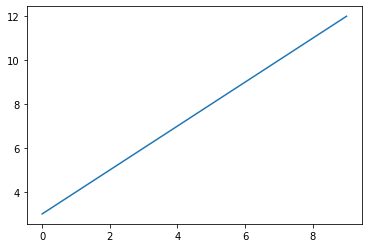

In [48]:
plt.plot(np.arange(0,10), np.arange(3,13))
plt.show()

In [45]:
def get_log_loss(y_true, y_pred):
    loss_val = log_loss(y_true, y_pred, labels = np.unique(y_true))
    return loss_val

In [53]:
mlc = MLPClassifier(hidden_layer_sizes = (128, 64, 32), activation = 'relu', max_iter = 250, verbose = True)

epochs = 150
train_losses = []
test_losses = []
for i in range(epochs):
    mlc = mlc.partial_fit(x_train, np.ravel(y_train), np.unique(y_train))
    train_losses.append(mlc.loss_)
    y_pred_proba = mlc.predict_proba(x_test)
    test_losses.append(get_log_loss(y_test, y_pred_proba))



Iteration 1, loss = 0.37573456
Iteration 2, loss = 0.34620268
Iteration 3, loss = 0.34131911
Iteration 4, loss = 0.33760161
Iteration 5, loss = 0.33606635
Iteration 6, loss = 0.33350334
Iteration 7, loss = 0.33152639
Iteration 8, loss = 0.33073955
Iteration 9, loss = 0.32900772
Iteration 10, loss = 0.32786743
Iteration 11, loss = 0.32637915
Iteration 12, loss = 0.32483682
Iteration 13, loss = 0.32401994
Iteration 14, loss = 0.32267116
Iteration 15, loss = 0.32237804
Iteration 16, loss = 0.32121839
Iteration 17, loss = 0.31985285
Iteration 18, loss = 0.31886177
Iteration 19, loss = 0.31776830
Iteration 20, loss = 0.31718006
Iteration 21, loss = 0.31594373
Iteration 22, loss = 0.31541283
Iteration 23, loss = 0.31429603
Iteration 24, loss = 0.31370895
Iteration 25, loss = 0.31262209
Iteration 26, loss = 0.31154491
Iteration 27, loss = 0.31135338
Iteration 28, loss = 0.30994330
Iteration 29, loss = 0.30894656
Iteration 30, loss = 0.30857514
Iteration 31, loss = 0.30770465
Iteration 32, los

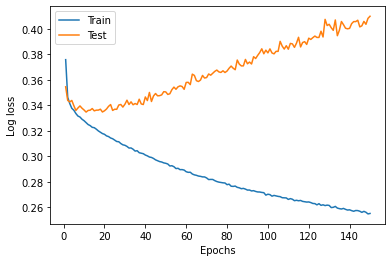

In [54]:
plt.ylabel('Log loss')
plt.xlabel('Epochs')
plt.plot(np.arange(1,151), train_losses, label = 'Train')
plt.plot(np.arange(1,151), test_losses, label = 'Test')  
plt.legend(['Train', 'Test'])
plt.show()

In [55]:
from sklearn.metrics import classification_report

In [56]:
y_pred = mlc.predict(x_test)
print(classification_report(y_test, y_pred, target_names = ['No Rain', 'Rain']))

              precision    recall  f1-score   support

     No Rain       0.88      0.91      0.90     22083
        Rain       0.65      0.58      0.61      6346

    accuracy                           0.84     28429
   macro avg       0.77      0.74      0.75     28429
weighted avg       0.83      0.84      0.83     28429

